In [2]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
#from keras import backend as K
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

170498071/170498071 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/5
1563/1563 [==============================] - 20s 7ms/step - loss: 1.6892 - accuracy: 0.3926 - val_loss: 1.4005 - val_accuracy: 0.5014
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3929 - accuracy: 0.4998 - val_loss: 1.2889 - val_accuracy: 0.5419
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2987 - accuracy: 0.5354 - val_loss: 1.2376 - val_accuracy: 0.5589
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2390 - accuracy: 0.5579 - val_loss: 1.2058 - val_accuracy: 0.5716
Epoch 5/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1915 - accuracy: 0.5752 - val_loss: 1.1812 - val_accuracy: 0.5807
Accuracy: 58.07%


In [3]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
#from keras import backend as K
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# create the model
model = Sequential()
#Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function and Dropout layer at 20%.
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
#Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function. Max Pool layer with size 2×2.
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.Dropout layer at 20%.
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
#Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function. Max Pool layer with size 2×2.
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.Dropout layer at 20%.
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
#Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function. Max Pool layer with size 2×2.
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Flatten the layer
model.add(Flatten())
#Dropout layer at 20%
model.add(Dropout(0.2))
#Fully connected layer with 1024 units and a rectifier activation function.Dropout layer at 20%.
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
#Fully connected layer with 512 units and a rectifier activation function.Dropout layer at 20%
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
#Fully connected output layer with 10 units and a Softmax activation function
model.add(Dense(num_classes, activation='softmax'))
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))









Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                      

In [4]:
import numpy as np


# Predict the first 4 images from the test set
num_images_to_predict = 4
predicted_labels = model.predict(X_test[:num_images_to_predict])

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predicted_labels, axis=1)

# Get the actual class labels for the first 4 images from the test set
actual_classes = np.argmax(y_test[:num_images_to_predict], axis=1)

# Compare the predicted classes with the actual classes
for i in range(num_images_to_predict):
    print("Image %d - Predicted Class: %d, Actual Class: %d" % (i+1, predicted_classes[i], actual_classes[i]))


1/1 [==============================] - 0s 348ms/step
Image 1 - Predicted Class: 3, Actual Class: 3
Image 2 - Predicted Class: 1, Actual Class: 8
Image 3 - Predicted Class: 8, Actual Class: 8
Image 4 - Predicted Class: 8, Actual Class: 0


Epoch 1/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1605 - accuracy: 0.5833 - val_loss: 1.1051 - val_accuracy: 0.6007
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1168 - accuracy: 0.5995 - val_loss: 1.0415 - val_accuracy: 0.6269
Epoch 3/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0751 - accuracy: 0.6170 - val_loss: 1.0426 - val_accuracy: 0.6330
Epoch 4/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0458 - accuracy: 0.6263 - val_loss: 0.9911 - val_accuracy: 0.6455
Epoch 5/5
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0211 - accuracy: 0.6358 - val_loss: 1.0012 - val_accuracy: 0.6417


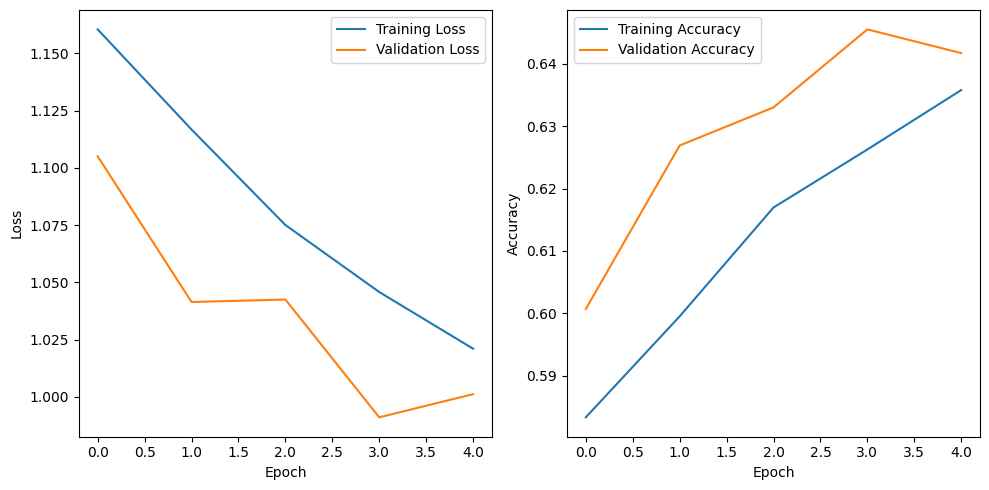

In [5]:
import matplotlib.pyplot as plt

# Assuming you have already trained and compiled the model

# Fit the model and store the training history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, verbose=1)

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
